# E-Commerce Customer Churn Analysis
### by Abraham Adiguna Kurnia Tarra
****

###  **Notebook Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Conclusion
6. Recommendation

****

## **`Initial Setup`**

In [2]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np

# Import visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Import library modeling
import pycaret
from pycaret.classification import *
from xgboost import XGBClassifier
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'missingno'

# this is the customer churn use case

## **`Business Problem`**

**Context**

Churn mengacu pada tingkat atau jumlah pelanggan yang meninggalkan suatu perusahaan atau layanan dalam periode waktu tertentu. Istilah ini sering digunakan untuk menggambarkan pelanggan yang berhenti menjadi pelanggan atau tidak lagi membeli produk pada perusahaan, yang pada akhirnya dapat berdampak negatif pada pendapatan perusahaan.

Tingkat churn yang rendah umumnya dianggap sebagai tanda kepuasan pelanggan yang tinggi, sementara churn yang tinggi dapat mengindikasikan masalah dalam produk, layanan, atau hubungan dengan pelanggan.

**Problem Statement**

Dalam lingkungan bisnis e-commerce yang kompetitif, tantangan utama yang dihadapi oleh perusahaan adalah bagaimana mengenali dan memahami perilaku pelanggan yang berpotensi melakukan churn. Tujuan utama adalah untuk mengidentifikasi pelanggan churn dengan akurat sehingga perusahaan dapat merancang dan melaksanakan promo yang sesuai dan efektif untuk mencegah churn.

**Project Stakeholders:**

Stakeholders yang akan menggunakan model dari analisis ini adalah:
* ***Marketing & Sales Departement***: Departement ini akan bertanggung jawab dalam mengembangkan dan merencanakan usaha marketing serta mengimplementasikan kepada pelanggan.
* ***Finance Departement***: Departement ini bertanggung jawab dalam mengatur keuangan perusahaan salah satunya promosi yang nantinya akan dilakukan Marketing & Sales Departement


**Goals**

Stakeholders dapat mengetahui pelanggan yang Churn dan tidak Churn sehingga mereka dapat melakukan pendekatan kepada pelanggan dan menawarkan promo secara tepat sasaran

**Analytic Approach**

Kita akan melakukan analisis untuk mengetahui pola data yang menentukan pelanggan churn dan tidak churn kemudian membangun model klasifikasi yang akan membantu stakeholders dalam memprediksi pelanggan churn dan tidak churn


**Metric Evaluation**

**Target**:   
0 : Not Churn (`Negative`)
<br>
1 : Churn (`Positive`)

**Metric Evaluation**:

|                       | ***Not Churn*-Pred** | ***Churn*-Pred** |
| --------------------- | -------------------- | ---------------- |
| ***Not Churn*-Act** |           TN           |          FP        |
| ***Churn*-Act**     |           FN           |          TP        |

**Type 1 Error** : **False Positive**
<br>
Interpretasi: pelanggan yang kenyataannya not Churn, tapi terprediksi sebagai pelanggan Churn 
<br>
Konsekuensi: 
* Perusahaan akan mengeluarkan biaya untuk pelanggan yang kurang tepat

**Type 2 Error** : **False Negative**
<br>
Interpretasi: pelanggan yang kenyataannya Churn, tapi terprediksi sebagai pelanggan not Churn
<br>
Konsekuensi: 
* Perusahaan akan kehilangan potensi pelanggan yang bisa saja menjadi pelanggan yang loyal.





Berdasarkan konsekuensi diatas. Resiko kehilangan pelanggan jauh lebih tinggi daripada mengeluarkan biaya untuk pelanggan yang kurang tepat. maka yang akan kita lakukan adalah fokus ke False Negative kita akan memfokukas ke recall dan f2-score

****

## **`Data Understanding`**

Dataset dapat di akses pada link berikut:
[E-commerce Customer Churn](https://drive.google.com/drive/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves)

| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| Tenure | Masa tenure pelanggan |
| WarehouseToHome | Jarak antara warehouse ke rumah pelanggan  |
| NumberOfDeviceRegistered | Jumlah perangkat yang terdaftar  |
| PreferedOrderCat | Kategori yang disukai pelanggan bulan lalu |
| SatisfactionScore | Skor kepuasan pelanggan terhadap service |
| MaritalStatus | Status pernikahan pelanggan |
| NumberOfAddress | Jumlah alamat yang terdaftar |
| Complain | Adakah complain dalam satu bulan terakhir |
| DaySinceLastOrder | Hari sejak pemesanan terakhir  |
| CashbackAmount | Rata-rata cashback bulan lalu  |
| Churn | Status churn pelanggan |

**Complain** 

Tidak ada Complain  : 0
<br>
Complain            : 1
<br>

**Churn** 

Tidak Churn : 0
<br>
Churn       : 1


In [2]:
data = pd.read_csv(r'H:\Capstone_3\data\raw\data_ecommerce_customer_churn.csv')


In [3]:
# jumlah baris dan kolom
print(f'Jumlah baris dan kolom: {data.shape[0]} baris dan {data.shape[1]} kolom')
display(
    data.describe(),    # numerical variable
    data.describe(include='object')    # categorical variable
)

Jumlah baris dan kolom: 3941 baris dan 11 kolom


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


**Insight** :
* Persebaran value pada CashbackAmount cukup besar. ditunjukan dari nilai standar deviasi 48.79
* Terdapat 3931 baris dan 11 kolom pada dataset


In [4]:
# Check karakteristik dataset
pd.DataFrame(
        {
        'feature': data.columns.values,
        'data_type': data.dtypes.values,
        'total_row': data.isna().count().values,
        'total_null': data.isna().sum().values,
        '%null_value': data.isna().mean().values * 100,
        'n_unique': data.nunique().values,
        'sample_unique': [data[col].unique() for col in data.columns]
        }
    )

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,Tenure,float64,3941,194,4.922608,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,3941,169,4.288252,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,3941,0,0.000000,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,3941,0,0.000000,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,3941,0,0.000000,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3941,0,0.000000,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,3941,0,0.000000,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,3941,0,0.000000,2,"[0, 1]"
8,DaySinceLastOrder,float64,3941,213,5.404720,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,3941,0,0.000000,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


**Insight**:

Numerikal variabel :
* Discrete : NumberOfDeviceRegistered, NumberOfAddress
* Continue : Tenure, WarehouseToHome, DaySinceLastOrder, CashbackAmount

Categorical Variabel:
* Nominal  : PreferedOrderCat, MaritalStatus, Churn
* Ordinal   : SatisfactionScore, Complain

Missing value :
* Tenure sebanyak 194 data (4.92%)
* WarehouseToHome sebanyak 169 data (4.29%)
* DaySinceLastOrder sebanyak 213 data (5.40%)

Tipe data untuk setiap variabel sudah sesuai 

Terdapat 2335 uniqe value pada kolom CashbackAmount

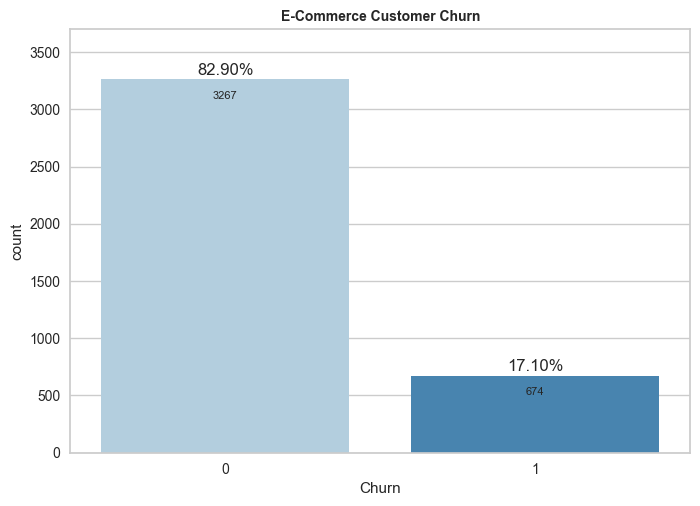

In [5]:
# create barplot
plt.title("E-Commerce Customer Churn", fontsize=10, weight='bold') # set title dan 
ax = sns.countplot(data=data, x="Churn", palette="Blues")
ax.set_ylim([0, 3700])
# annotation
for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')

for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')

plt.show();

**Insight** :
* Jumlah pengguna yang Churn sebanyak 674 (17.10%)
* Jumlah pengguna yang Tidak Churn sebanyak 3267 (82.90%)

## **Numerikal Variabel**

Pengaruh masing-masing variabel/Fitur terhadap Churn 

**| Discrete**

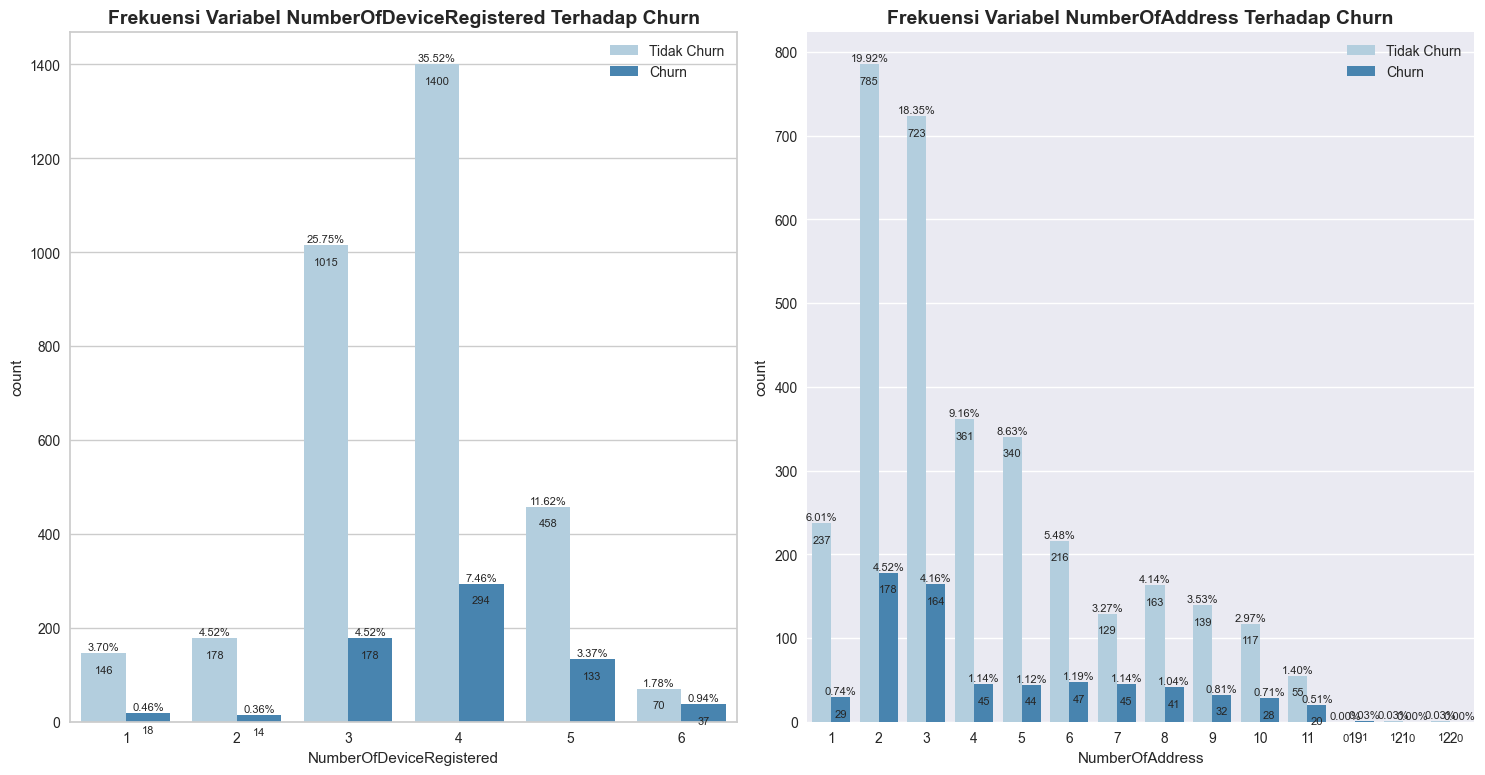

In [6]:
discrete = ["NumberOfDeviceRegistered", "NumberOfAddress"]

plt.figure(figsize=(15,15))
cmap = plt.get_cmap("Blues")

a=1
for i in discrete:
    plt.subplot(2,2,a)
    ax = sns.countplot(data=data, x=i, hue="Churn", palette="Blues")
    plt.legend(labels=["Tidak Churn", "Churn"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Churn", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', size=8,)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')

plt.show()

**Insight** :

* Pelanggan dengan jumlah Device terdaftar lebih dari 3 device memiliki tingkat churn yang lebih besar
* Pelanggan dengan jumlah yang memiliki jumlah address lebih dari 2 memiliki tingkat churn yang leih esar
<br>
kita dapat menyimpulkan bahwa pelanggan yang memiliki jumlah address lebih dari dua biasanya membeli baranng di ecommerce kita kara kerabat atau orang tua pembeli kurang pamaham dalam pemesanan di ecommerce kita

**| Continue**

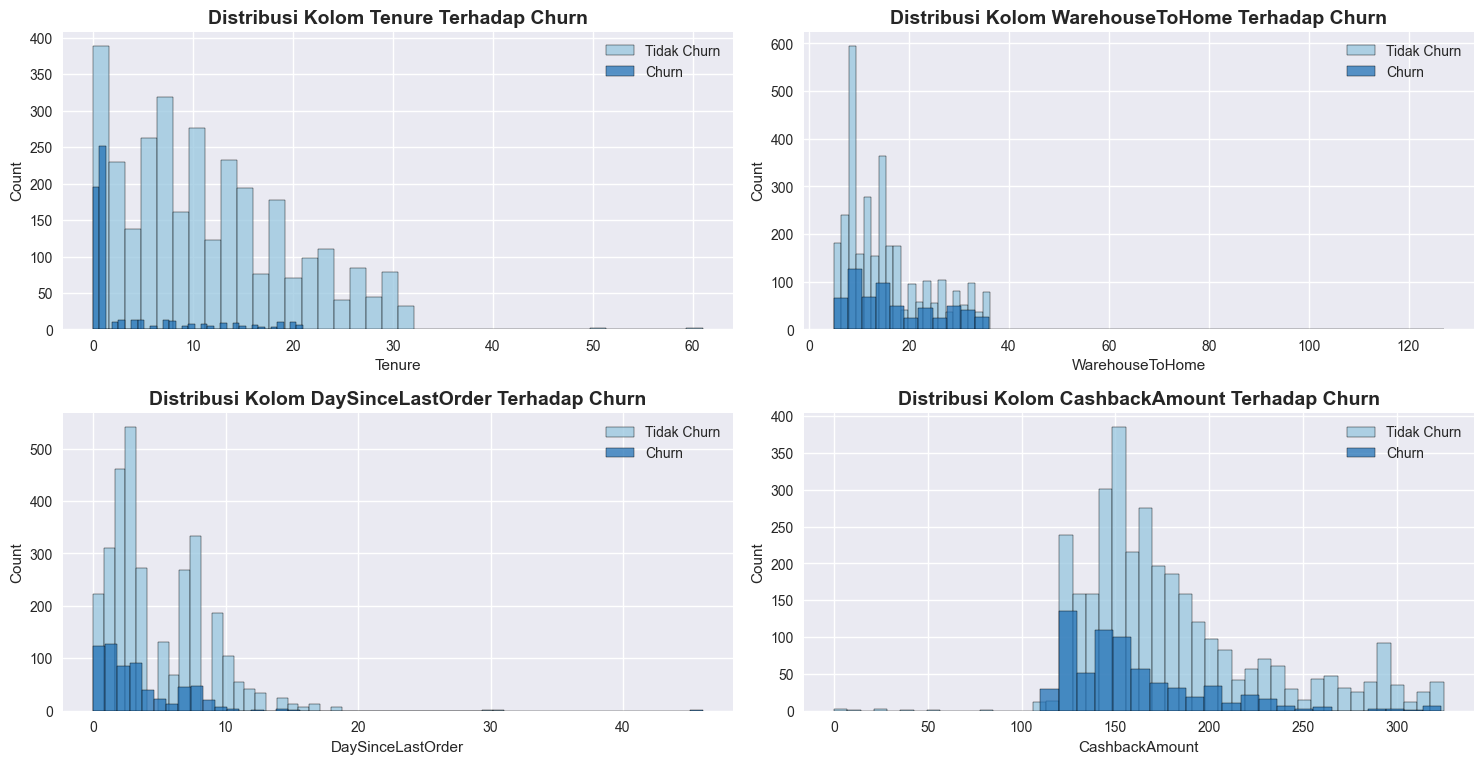

In [7]:
continue_ = ["Tenure", "WarehouseToHome", "DaySinceLastOrder", "CashbackAmount"]

plt.figure(figsize=(15,15))
cmap = plt.get_cmap("Blues")

a=1
for i in continue_:
    plt.subplot(4,2,a)
    sns.histplot(x=data[data["Churn"]==0][i],color=cmap([100]))
    sns.histplot(x=data[data["Churn"]==1][i],color=cmap([190]))
    plt.legend(labels=["Tidak Churn", "Churn"])
    plt.tight_layout()
    plt.title(f"Distribusi Kolom {i} Terhadap Churn", fontsize=14, weight='bold')
    a+=1

plt.show()

**Insight** :
* Pada kolom Tenure, pelanggan churn terjadi pada awal bulan pemakaian . Hal tersebut kemungkinan bisa terjadi dikarenakan pelanggan masih beradaptasi dengan platform e-commerce kita
* Pada kolom WarehouseToHome, pelanggan dengan jarak gudang ke rumah kurang dari 20 mil cenderung churn. Hal tersebut mungkin dikarenakan ongkos kirim yang terlalu mahal atau waktu pengiriman yang relalu lama untuk jarak ayng dekat
* Pada kolom DaySinceLastOrder, pelanggan terbanyak churn terjadi satu sampai dua hari setelah melakukan order. Hal tersebut mungkin terjadi dikarenakan pelanggan hanya membutuhkan barang dari e-commerce dan tidak tertarik dengan platform e-commerce tersebut
* Pada kolom CashbackAmount nilai dibawah 100 dolar kemungkinan adalah nilai outlier, kita tidak tau berapa presentasi cashback yang didapat pelanggan dari total belanjaanya

## **Categorical Variabel**


**| Nominal**

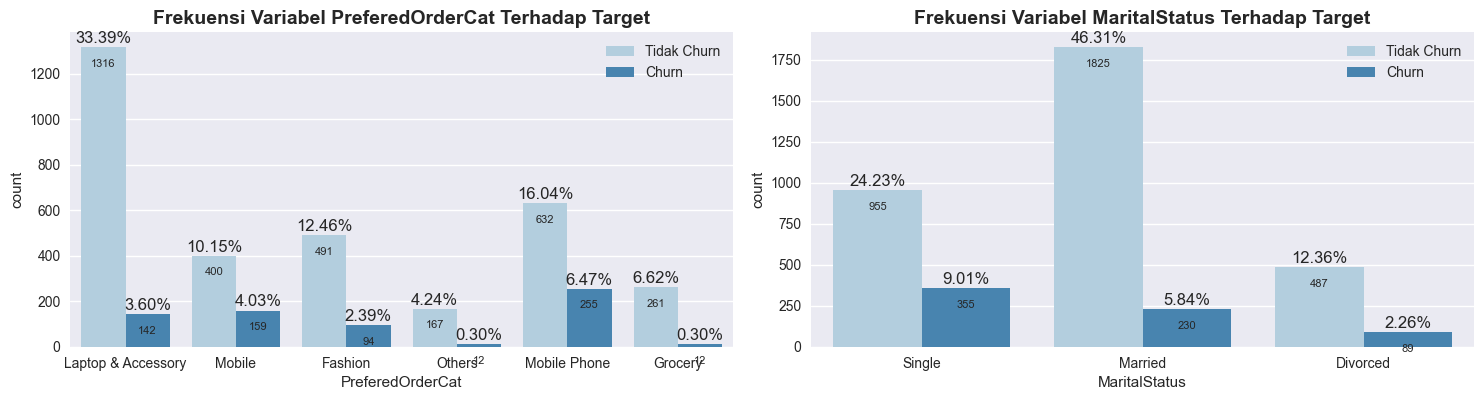

In [8]:
nominal = ["PreferedOrderCat", "MaritalStatus"]

plt.figure(figsize=(15,15))
cmap = plt.get_cmap("Blues")

a=1
for i in nominal:
    plt.subplot(4,2,a)
    ax = sns.countplot(data=data, x=i, hue="Churn", palette="Blues")
    plt.legend(labels=["Tidak Churn", "Churn"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')

plt.show()

**Insight**:
* Kategori Laptop & Accessory menjadi kategori paling digemari pelanggan kita dapat mengambil kesimpulan bahwa E-commerce kita didominasi pelanggan yang mencari barang-barang elektronik
* kategori mobile dan mobile Phone bisa dijadikan satu kategori
* Pada kategori Marital Status didominasi oleh pelaggann yang statusnya married dan pelangga yang statusnya singel memiliki tingkat churn yang tinggi

In [9]:
# Mengganti kategori Mobile menjadi kategori Mobile Phone

data.replace("Mobile", "Mobile Phone", inplace=True)

**| Ordinal**

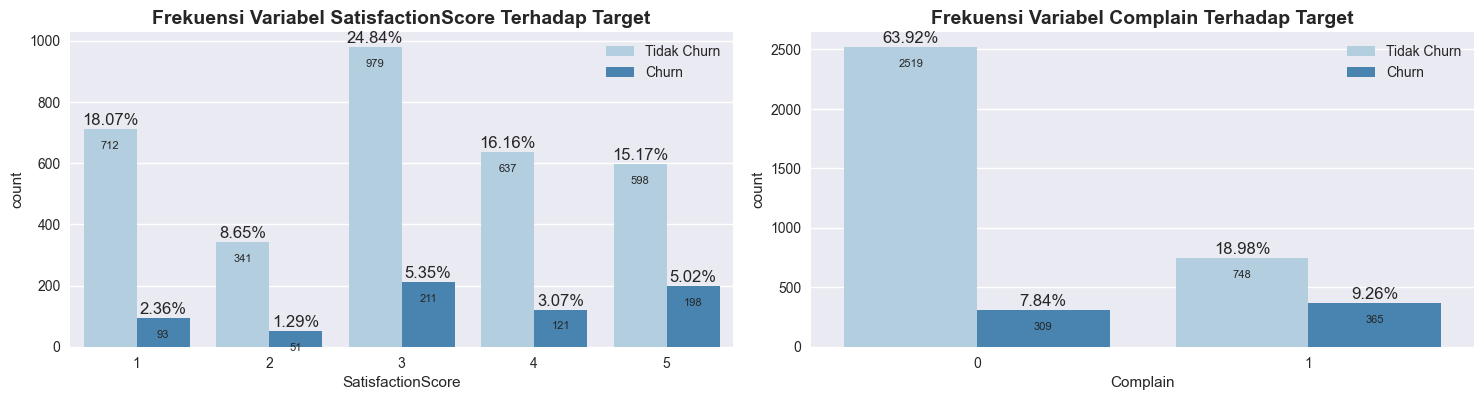

In [10]:
ordinal = ["SatisfactionScore", "Complain"]

plt.figure(figsize=(15,15))
cmap = plt.get_cmap("Blues")

a=1
for i in ordinal:
    plt.subplot(4,2,a)
    ax = sns.countplot(data=data, x=i, hue="Churn", palette="Blues")
    plt.legend(labels=["Tidak Churn", "Churn"])
    plt.tight_layout()
    plt.style.use("seaborn")
    plt.title(f"Frekuensi Variabel {i} Terhadap Target", fontsize=14, weight="bold")
    a+=1
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center',
                    size=8,
                    xytext = (0, -12), 
                    textcoords = 'offset points')
        
plt.show()

**Insight**:
* Baik pelanggan Churn maupun tidak churn tingkat Satisfaction Score tertinggi di 3
* Terlepas dari peresentasi pada kolom Complain perusahaan perlu meningkatkan lagi pelayanan e-commerce 


****

## **`Data Preparation`**

In [11]:
df = data.copy()
df.sample(5)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
568,1.0,24.0,4,Mobile Phone,3,Married,2,1,1.0,152.41,1
3765,1.0,13.0,5,Mobile Phone,1,Single,3,1,1.0,154.26,1
2011,1.0,30.0,5,Laptop & Accessory,3,Married,3,0,9.0,160.40,0
2214,28.0,8.0,3,Fashion,4,Married,4,0,NaN,209.76,0
3181,NaN,21.0,3,Mobile Phone,3,Married,2,0,2.0,122.07,0


#### **Finding Problematic Data**

**| Missing value**

Jumlah total missing value: 576
Jumlah baris yang terdapat missing value: 576
Persentase baris dengan missing value: 14.62%


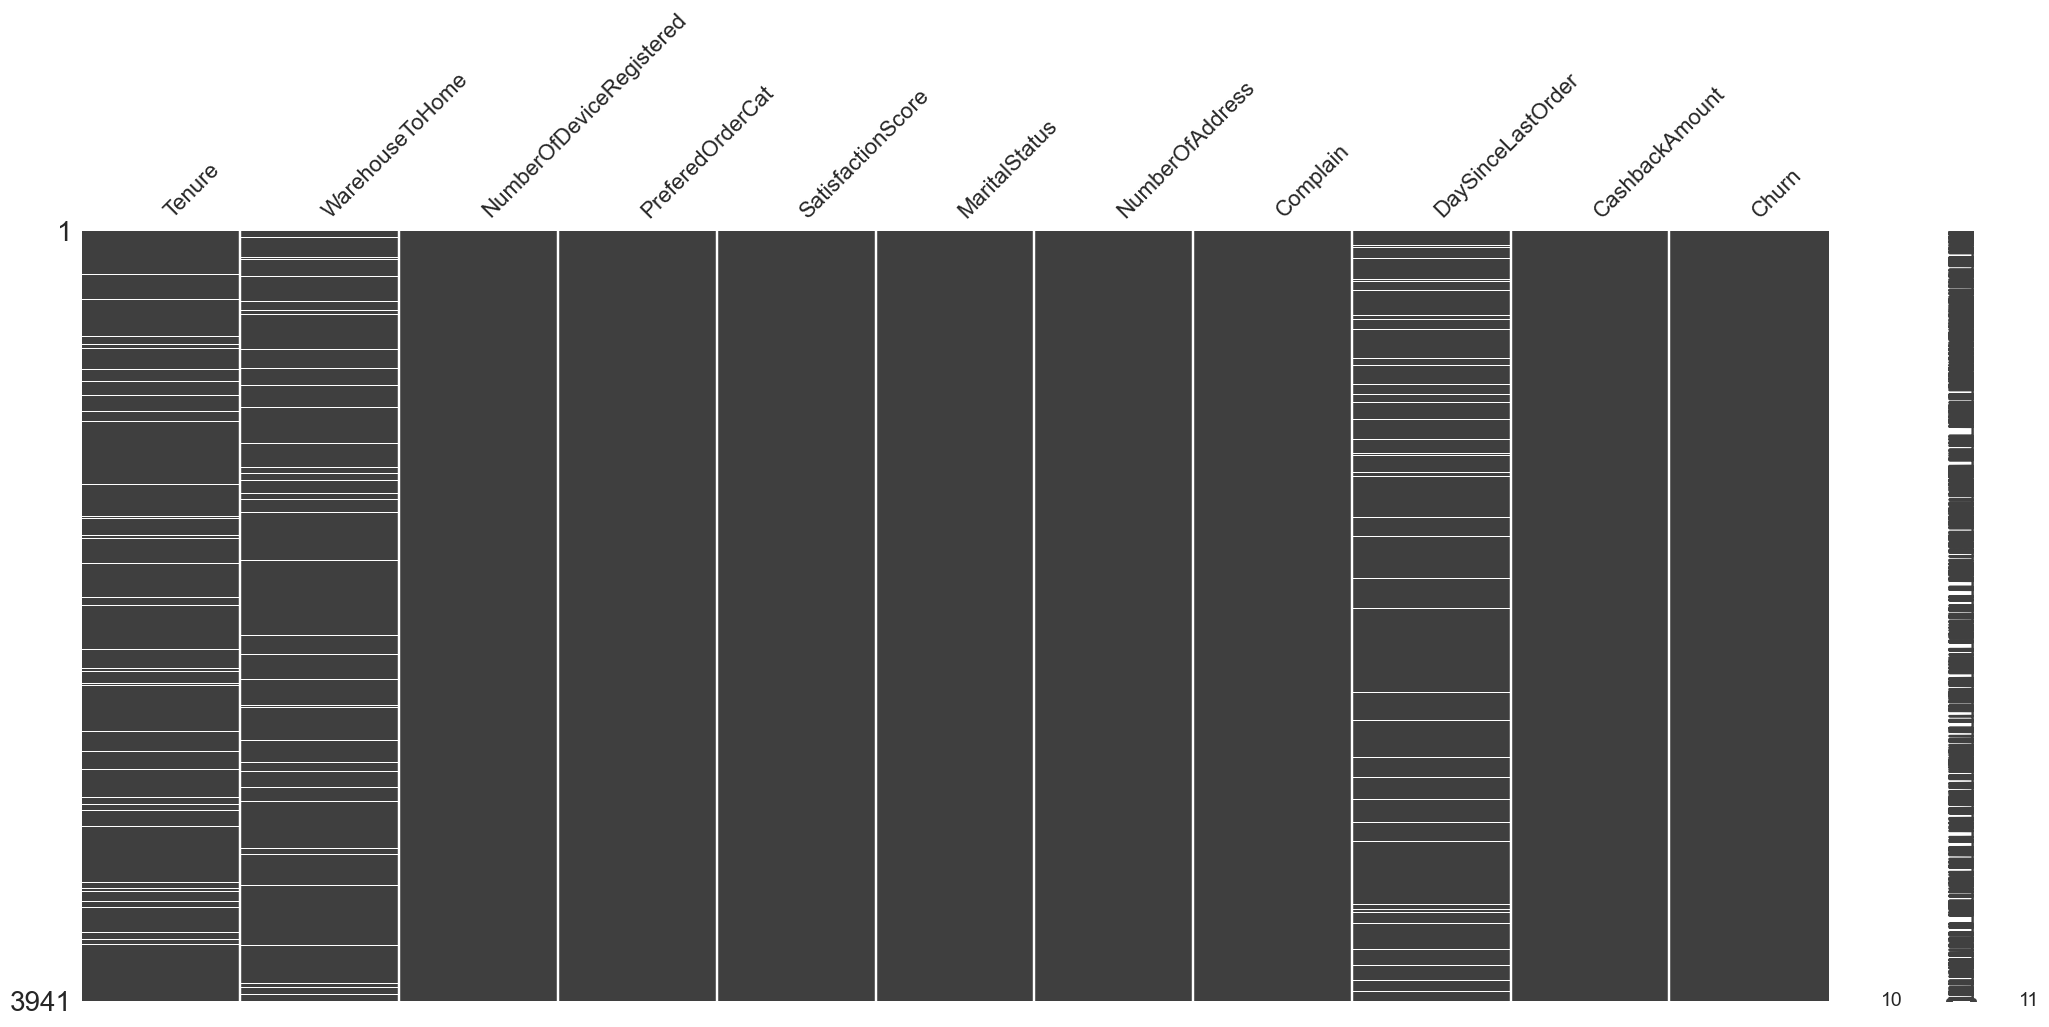

In [12]:
msno.matrix(df)
print(f'''Jumlah total missing value: {df.isnull().sum().sum()}
Jumlah baris yang terdapat missing value: {df[df.isnull().any(axis=1)].shape[0]}
Persentase baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')

**Insight**:
*Terdapat 14.62% missing value yang tersebar di 3 kolom nanti kita akan hendel dengan iterative inputer

**| Outlier**

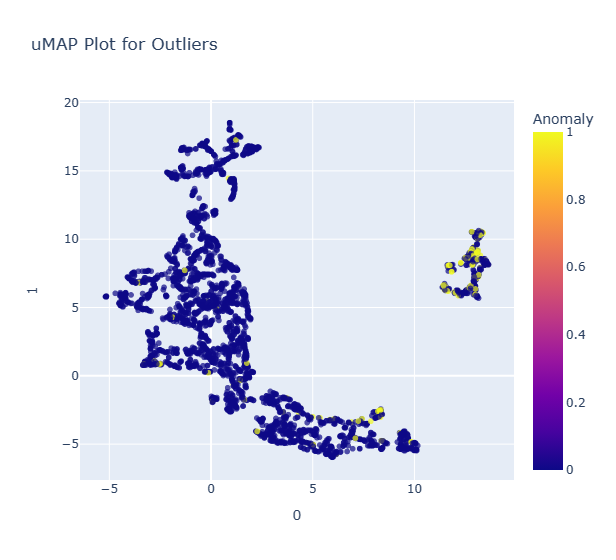

In [13]:
from pycaret.anomaly import *

exp_name = setup(data=df, outliers_threshold=0.05, verbose=False, remove_outliers=False)
detector = create_model('iforest', verbose=False)
plot_model(detector, plot='umap', scale=0.7)

In [14]:
n_outlier = assign_model(detector).query("Anomaly == 1").shape[0]
print(f"Persentase outlier: {(n_outlier/df.shape[0]) * 100}%")

Persentase outlier: 4.998731286475514%


**Insight**:
* Terdapat 5% dari total data terdeteksi sebagai outlier, nilai ini masih bisa dinilai wajar

**| Duplicated Data**

In [15]:
nDuplicated = df.duplicated().sum()
Duplicated = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {nDuplicated}\nPersentase Data Duplikat: {Duplicated}%')

Jumlah Data Duplikat: 672
Persentase Data Duplikat: 17.05%


In [16]:
# drop duplikat data
df = df.drop_duplicates(keep='last', ignore_index=True)

**| Membagi dataset**

In [17]:
from sklearn.model_selection import train_test_split

df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=42)
df_seen.shape, df_unseen.shape

((2615, 11), (654, 11))

**| Handling Missing value**

In [18]:
def imputation(df_seen, df_unseen, cont_features):
    imputerCont = IterativeImputer(max_iter=10, random_state=0)
    imputerCont.fit(df_seen[cont_features])
    df_seen[cont_features] = imputerCont.transform(df_seen[cont_features])
    df_unseen[cont_features] = imputerCont.transform(df_unseen[cont_features])
    return df_seen, df_unseen

In [19]:
# Fit&transform missing value imputation
colsMissing = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]

df_seen, df_unseen= imputation(df_seen, df_unseen, colsMissing)

In [20]:
from pycaret.internal.preprocess.transformers import TransformerWrapper, RemoveOutliers

pipeline = [
    ("remove outlier", TransformerWrapper(transformer=RemoveOutliers(method='iforest', random_state=42, threshold=0.05))),
]

In [21]:
from pycaret.classification import *
setup(
    data = df_seen,
    target = 'Churn',
    remove_outliers= 'iforest',
    experiment_name='Customer Churn',
    log_experiment='dagshub',
    log_data=True,
    log_plots=True,    
)

,Description,Value
0,Session id,1296
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(2615, 11)"
4,Transformed data shape,"(2523, 17)"
5,Transformed train set shape,"(1738, 17)"
6,Transformed test set shape,"(785, 17)"
7,Numeric features,8
8,Categorical features,2
9,Preprocess,True


Repository initialized!

Uploading files (2) to "abrahamtarra/Customer_Churn"...

Upload finished successfully!

In [22]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Tenure', 'WarehouseToHome',
                                             'NumberOfDeviceRegistered',
                                             'SatisfactionScore',
                                             'NumberOfAddress', 'Complain',
                                             'DaySinceLastOrder',
                                             'CashbackAmount'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_valu...
                                    transformer=OneHotEncoder(cols=['PreferedOrderCat',
                                                                    'MaritalStatus'],
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('remove_outliers',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=RemoveOutliers(method='iforest',
                                                               n_jobs=1,
                                                               random_state=1296,
                                                               threshold=0.05)))],
         verbose=False)

****

## **`Modeling`**

Pertama kita tambahkan metric f2-score measure untuk evaluasi model dengan nilai beta 2, artinya recall 2x lebih penting dari presisi. membuat model klasifikasi dengan lebih meminimalkan prediksi false negative dibanding false positive

In [23]:
from sklearn.metrics import fbeta_score, balanced_accuracy_score

add_metric('f2', 'F2', fbeta_score, greater_is_better=True, target='pred', beta=2.0)
add_metric('bacc', 'Bal. Accuracy', balanced_accuracy_score, greater_is_better=True, target='pred')
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x0000017C1BC275E0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x0000017C1BC27...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x0000017C1BC27...,make_scorer(matthews_corrcoef),pred,{},True,True,False
f2,F2,F2,<function fbeta_score at 0x0000017C1BC279D0>,"make_scorer(fbeta_score, beta=2.0)",pred,{'beta': 2.0},True,True,True
bacc,Bal. Accuracy,Bal. Accuracy,<function balanced_accuracy_score at 0x0000017...,make_scorer(balanced_accuracy_score),pred,{},True,True,True


In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Ini adalah macam-macam model yang dapat kita gunakan 

In [25]:
_ = compare_models(include=['ada', 'gbc', 'xgboost', 'rf', 'lr', 'knn', 'dt','nb'], sort='f2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:26:41
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8989,0.9083,0.6107,0.7508,0.6726,0.6136,0.6188,0.6339,0.7843,5.2440
nb,Naive Bayes,0.7333,0.8158,0.7652,0.3666,0.4947,0.3438,0.3871,0.6272,0.7460,5.6330
gbc,Gradient Boosting Classifier,0.8989,0.9094,0.5853,0.7705,0.6632,0.6051,0.6142,0.6138,0.7742,5.4890
rf,Random Forest Classifier,0.8962,0.9160,0.5564,0.7723,0.6453,0.5864,0.5981,0.5886,0.7611,5.7460
ada,Ada Boost Classifier,0.8847,0.8771,0.5561,0.7088,0.6209,0.5542,0.5613,0.5799,0.7540,6.6100
dt,Decision Tree Classifier,0.8557,0.7455,0.5786,0.5824,0.5767,0.4903,0.4926,0.5770,0.7455,5.2410
lr,Logistic Regression,0.8743,0.8801,0.4467,0.7114,0.5450,0.4769,0.4962,0.4809,0.7042,5.5980
knn,K Neighbors Classifier,0.8361,0.7886,0.3379,0.5329,0.4111,0.3218,0.3342,0.3635,0.6380,5.5260


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

In [26]:
lr = create_model('lr', cross_validation=False, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:38:14
Status,. . . . . . . . . . . . . . . . . .,Fitting Logistic Regression
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy
Test,0.8739,0.8827,0.4662,0.6889,0.5561,0.4857,0.4983,0.4984,0.7116
Train,0.8787,0.8884,0.4662,0.7214,0.5664,0.4996,0.5157,0.5017,0.7147


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [10],
}

tuned_lr = tune_model(lr, optimize='Bal. Accuracy', choose_better=True, n_iter=10, search_algorithm='random', return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:38:24
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
xgboost = create_model('xgboost', cross_validation=False, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:53:06
Status,. . . . . . . . . . . . . . . . . .,Fitting Extreme Gradient Boosting
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy
Test,0.9121,0.9185,0.6692,0.7807,0.7206,0.6689,0.6717,0.6889,0.8154
Train,0.9962,0.9912,0.9775,1.0000,0.9886,0.9863,0.9864,0.9819,0.9887


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
en_xgboost = ensemble_model(
    estimator=xgboost,
    method='Bagging',
    optimize='Bal. Accuracy',
    probability_threshold=0.40,
    verbose=False
)

parameters = {
    'n_estimators': [10, 50, 100, 150],
}

tuned_xgboost = tune_model(
    estimator=en_xgboost, 
    optimize='Prec.', 
    n_iter=100, 
    custom_grid=parameters, 
    search_library='scikit-learn',
    search_algorithm='random', 
    return_train_score=True
)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
nb = create_model('nb', cross_validation=False, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:11:44
Status,. . . . . . . . . . . . . . . . . .,Fitting Naive Bayes
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy
Test,0.7032,0.8092,0.7970,0.3397,0.4764,0.3132,0.3687,0.6280,0.7405
Train,0.7290,0.8252,0.7814,0.3621,0.4949,0.3421,0.3894,0.6345,0.7498


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
en_nb = ensemble_model(
    estimator=nb,
    method='Bagging',
    optimize='Bal. Accuracy',
    probability_threshold=0.40,
    verbose=False
)

parameters = {
    'n_estimators': [10, 50, 100, 150],
}

tuned_nb = tune_model(
    estimator=en_nb, 
    optimize='Prec.', 
    n_iter=100, 
    custom_grid=parameters, 
    search_library='scikit-learn',
    search_algorithm='random', 
    return_train_score=True
)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
dt = create_model('dt', cross_validation=False, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:20:21
Status,. . . . . . . . . . . . . . . . . .,Fitting Decision Tree Classifier
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy
Test,0.8828,0.7858,0.6391,0.6589,0.6489,0.5785,0.5786,0.6430,0.7858
Train,0.9923,0.9877,0.9807,0.9744,0.9776,0.9730,0.9730,0.9794,0.9877


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
en_dt = ensemble_model(
    estimator=dt,
    method='Bagging',
    optimize='Bal. Accuracy',
    probability_threshold=0.40,
    verbose=False
)

parameters = {
    'n_estimators': [10, 50, 100, 150],
}

tuned_dt = tune_model(
    estimator=en_dt, 
    optimize='Prec.', 
    n_iter=100, 
    custom_grid=parameters, 
    search_library='scikit-learn',
    search_algorithm='random', 
    return_train_score=True
)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [39]:
_ = compare_models(include=[tuned_dt, tuned_nb, tuned_xgboost,tuned_lr], sort='f2')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy,TT (Sec)
3,Logistic Regression,0.7951,0.8805,0.8196,0.4466,0.5774,0.4579,0.4950,0.7014,0.8048,6.2180
2,Bagging Classifier,0.9044,0.9161,0.6685,0.7483,0.7043,0.6476,0.6503,0.6820,0.8106,6.1120
0,Bagging Classifier,0.8874,0.9133,0.6781,0.6715,0.6734,0.6055,0.6065,0.6759,0.8042,9.2440
1,Bagging Classifier,0.6650,0.8163,0.8135,0.3199,0.4560,0.2800,0.3441,0.6166,0.7241,6.0730


Processing:   0%|          | 0/21 [00:00<?, ?it/s]

Setelah dicompare kita mendapatkan Logistic Regression sebagai yang terbaik karna fokus kita di Recall dan F2-score

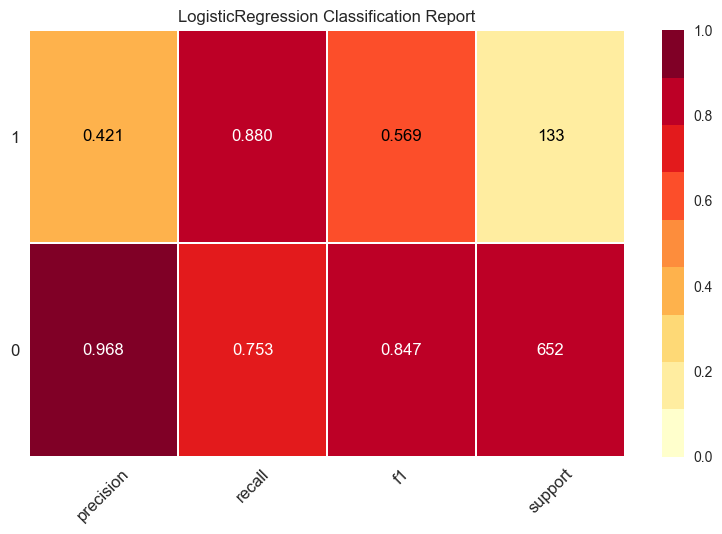

In [40]:
plot_model(tuned_lr, plot='class_report')

In [41]:
_ = predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy
0,Logistic Regression,0.7745,0.8782,0.8797,0.4209,0.5693,0.4413,0.4963,0.7222,0.8164


### **Final Model**

In [42]:
final_model = finalize_model(tuned_lr)

In [43]:
_ = predict_model(final_model, data=df_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,Bal. Accuracy
0,Logistic Regression,0.7890,0.8786,0.7978,0.3717,0.5071,0.3948,0.4414,0.6490,0.7927


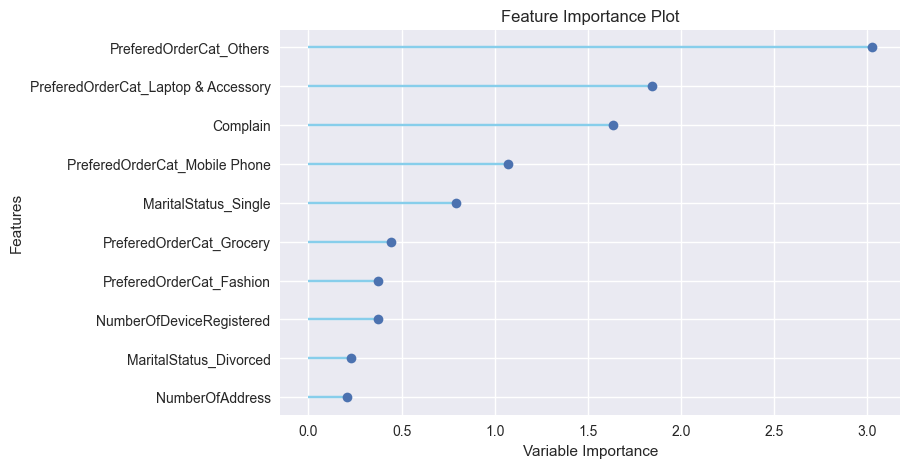

In [44]:
plot_model(final_model, plot='feature')

Dari data diatas dapat dilihat faktor mana yang mempengaruhi potensi pelanggan churn. Terdapat 3 teratas :Prefered order dan Complain 

Selain itu faktor-faktor tersebut juga bisa menjadi insight untuk bisnis, dimana perusahaan harus menerima feedback dari pelanggan dan apa prefered dari pelanggan.

### **Save Model**

In [45]:
import pickle
pickle.dump(final_model, open('E-Commerce Customer Churnn.sav', 'wb'))

## **`Conclusion and Recomendation`**

Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunaka model yang sudah dibuat, model dapat mengetahui 87% pelaggan yang churn tapi terprediksi tidak churn

* Total Pelaggan Churn yang ditemukan : 674
* total Pelanggan yang churn tapi terprediksi tidak Churn : 3267 x 0.87 = 2842 | 3267 - 2842 = 425

Jadi ada 1099 orang yang sebenarnya terprediksi Churn dari total 3941 pelanggan

Rekomendasi :
adapun beberapa rekomendasi yang dapat diberikan sebagai berikut 
* Memberikan promo, cashback dsb kepada pelanggan sehingga lebih tertarik menggunakan platform E-Commerce
* Memperhatikan Complain yang diberikan pelanggan
* Memberikan Penawaran pemotongan Ongkos kirim. Terlihat dari grafik banyak customer churn yang memiliki jarak yang dekat dengan warehouse